# 特徴量エンジニアリング（数値特徴量）

In [ ]:
!git clone https://github.com/nejumi/fe_workshop.git

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
pd.set_option('display.max_columns', 100)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
# collaboratoryにLendingClub50000.csvをアップロードする。
from google.colab import files
#uploaded = files.upload() # ローカルからアップロードできるが今回は使用しない。

In [31]:
# ファイルを読み込む
df = pd.read_csv('dataset/LendingClub50000.csv')

In [32]:
df.head()

,ID,member_id,year,month,loan_amount,purpose_type,purpose_detail,title,emp_length,home_ownership,annual_inc,zip_code,addr_state,dti,grade,sub_grade,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,bad_loan
0,1529851,1793711,2012,9,16000.0,debt_consolidation,Debt Consolidation / Final Wedding Exp,PwC,3.0,RENT,90400.0,080xx,NJ,23.72,A,A4,0.0,Oct-2003,0.0,NaN,NaN,21.0,0.0,3946.0,22.4,42.0,f,0.0,NaN,INDIVIDUAL,0.0,0.0,164787.0,False
1,1824764,2126933,2012,11,3600.0,debt_consolidation,Crush Credit Cards,Morgan Stanley Smith Barney,2.0,RENT,42500.0,217xx,MD,17.34,B,B3,0.0,Dec-2004,0.0,NaN,NaN,16.0,0.0,10927.0,63.5,30.0,f,0.0,NaN,INDIVIDUAL,0.0,8806.0,96627.0,False
2,403548,442721,2009,5,19200.0,wedding,Consolidate debt and pay for wedding,Aggregate Knowledge,1.0,RENT,95000.0,940xx,CA,7.58,B,B4,0.0,Mar-1999,0.0,NaN,NaN,11.0,0.0,14006.0,20.3,26.0,f,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,False
3,646411,799671,2011,1,21000.0,credit_card,Wells BofA Credit Card Refi,Emerson Process Management,1.0,RENT,85000.0,926xx,CA,17.07,B,B5,0.0,Jun-1999,1.0,NaN,NaN,12.0,0.0,36280.0,47.6,25.0,f,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,False
4,552526,711946,2010,7,4000.0,other,Debt Consolidation,Home Depot,1.0,RENT,63500.0,303xx,GA,19.50,C,C4,1.0,Oct-2002,2.0,23.0,NaN,16.0,0.0,595.0,11.4,24.0,f,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,False


## 各標準化手法と対数変換をそれぞれ試して統計量と分布をみてみる

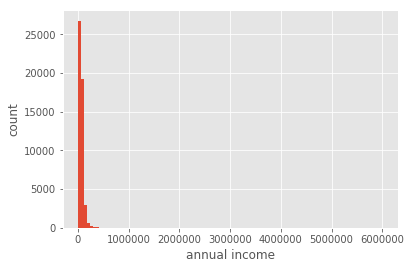

In [33]:
# annual_inc（年収入）の分布をみてみよう
df.annual_inc.hist(bins=100)
plt.xlabel('annual income')
plt.ylabel('count')
plt.show()

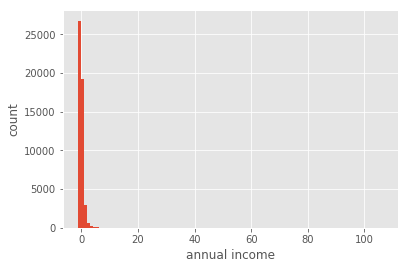

count    4.999700e+04
mean    -1.810150e-16
std      1.000010e+00
min     -1.209059e+00
25%     -4.897813e-01
50%     -1.669454e-01
75%      2.527411e-01
max      1.063689e+02
Name: annual_inc, dtype: float64


In [34]:
# StandardScalerの場合
# mean=0, std=1になっているが、分布形状には変化がないことがわかる。
scaler = StandardScaler()
df_temp = df.copy()

df_temp.loc[df.annual_inc.isnull()==False, 'annual_inc'] = scaler.fit_transform(df[['annual_inc']].dropna())

df_temp.annual_inc.hist(bins=100)
plt.xlabel('annual income')
plt.ylabel('count')
plt.show()

print(df_temp.annual_inc.describe())

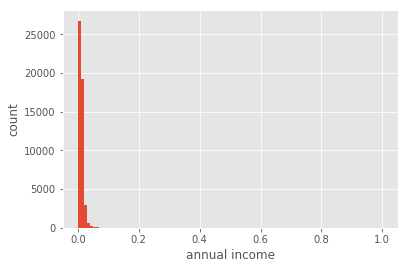

count    49997.000000
mean         0.011239
std          0.009296
min          0.000000
25%          0.006686
50%          0.009687
75%          0.013588
max          1.000000
Name: annual_inc, dtype: float64


In [35]:
# MinMaxScalerの場合
# min=0, max=1になっているが、分布形状には変化がないことがわかる。
scaler = MinMaxScaler()
df_temp = df.copy()

df_temp.loc[df.annual_inc.isnull()==False, 'annual_inc'] = scaler.fit_transform(df[['annual_inc']].dropna())

df_temp.annual_inc.hist(bins=100)
plt.xlabel('annual income')
plt.ylabel('count')
plt.show()

print(df_temp.annual_inc.describe())

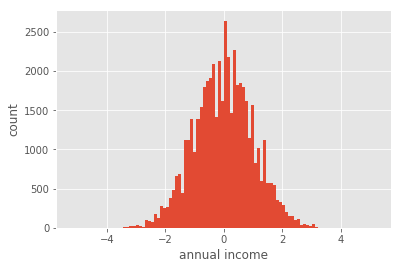

count    49997.000000
mean        -0.000157
std          0.998622
min         -5.199338
25%         -0.668987
50%          0.022584
75%          0.674490
max          5.199338
Name: annual_inc, dtype: float64


In [36]:
# QuantileTransformer(RankGauss)の場合
# mean=0, std=1になっており、分布形状も正規分布になっている。
scaler = QuantileTransformer(output_distribution='normal')
df_temp = df.copy()

df_temp.loc[df.annual_inc.isnull()==False, 'annual_inc'] = scaler.fit_transform(df[['annual_inc']].dropna())

df_temp.annual_inc.hist(bins=100)
plt.xlabel('annual income')
plt.ylabel('count')
plt.show()

print(df_temp.annual_inc.describe())

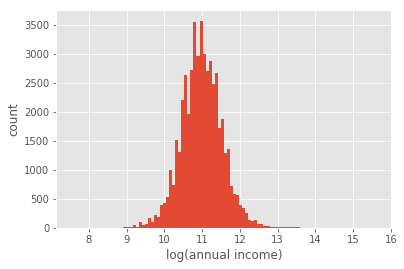

In [37]:
# annual_inc（年収入）は対数正規分布に従うことが知られている。
np.log(df.annual_inc).hist(bins=100)
plt.xlabel('log(annual income)')
plt.ylabel('count')
plt.show()

In [38]:
df['annual_inc_d_emp_length'] = df.annual_inc / df.emp_length

In [39]:
df['annual_inc_d_tot_cur_bal'] = df.annual_inc / df.tot_cur_bal

In [40]:
start_year = df.earliest_cr_line.dropna().apply(lambda x: int(x.split('-')[-1]))
df.loc[df.earliest_cr_line.isnull()==False, 'since_start'] = df.loc[df.earliest_cr_line.isnull()==False, 'year'] - start_year

In [41]:
# 対数変換を採用することとして元データを置換する。
df.loc[df.annual_inc.isnull()==False, 'annual_inc'] = np.log(df.annual_inc.dropna())

In [42]:
df.to_csv('LendingClub50000_num.csv', index=False)

In [ ]:
# ダウンロードしたら、DataRobotでもう一度予測してみよう
files.download('LendingClub50000_num.csv')